In [12]:
import pandas as pd
import random
import os

# 랜덤하게 각 주식의 가격 100개의 데이터 생성
# 시계열 데이터는 항상 date형식으로 되어있어야함
dates=pd.date_range(start='2021-01-04',periods=100,freq='D') 

# 삼성 전자 주식 데이터
samsung_prices=[random.randint(70000,90000) for _ in range(100)]
samsung_data={'Date':dates,'005930.KS':samsung_prices}
samsung_df=pd.DataFrame(samsung_data)
samsung_df.set_index('Date',inplace=True) # index를 Date로

# LG 전자 주식 데이터
lg_prices=[random.randint(140000,160000) for _ in range(100)]
lg_data={'Date':dates,'066570.KS':lg_prices}
lg_df=pd.DataFrame(lg_data)
lg_df.set_index('Date',inplace=True)

# 두 데이터프레임을 합쳐서 하나의 데이터프레임으로 만들기
df=pd.concat([samsung_df,lg_df],axis=1)
df=df.loc[:,['005930.KS','066570.KS']]
df.columns=['Samsung','LG']


# 이미 폴더가 생성되어있으면 error가 발생하는데 이를 방지하기 위함
os.makedirs('../data',exist_ok=True)
# csv 파일로 저장
df.to_csv('../data/stock_price.csv')

In [10]:
# csv 읽기
df=pd.read_csv('../data/stock_price.csv')
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
print(df)

# 두 종목의 수익률 계산
# 이전의 행값과의 비교를 통해 계산하게 됨
# 이전 값이 없는 2021-01-04 항은 NaN 값이 발생
returns = df.pct_change()
print(returns)

# 수익률 간의 상관 계수 계산
corr_matrix=returns.corr()
print(corr_matrix)

            Samsung      LG
Date                       
2021-01-04    84442  148737
2021-01-05    71308  155273
2021-01-06    83527  151413
2021-01-07    89668  149309
2021-01-08    76579  143914
...             ...     ...
2021-04-09    82455  152055
2021-04-10    76952  140631
2021-04-11    85507  157621
2021-04-12    83193  152896
2021-04-13    88491  148444

[100 rows x 2 columns]
             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.155539  0.043943
2021-01-06  0.171355 -0.024859
2021-01-07  0.073521 -0.013896
2021-01-08 -0.145972 -0.036133
...              ...       ...
2021-04-09  0.141467  0.084604
2021-04-10 -0.066739 -0.075131
2021-04-11  0.111173  0.120813
2021-04-12 -0.027062 -0.029977
2021-04-13  0.063683 -0.029118

[100 rows x 2 columns]
          Samsung        LG
Samsung  1.000000 -0.099192
LG      -0.099192  1.000000


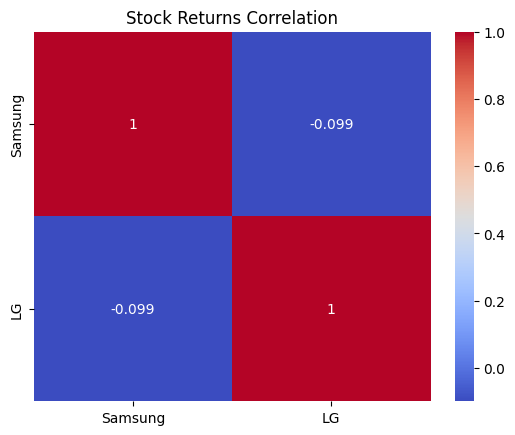

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Stock Returns Correlation')
plt.show()